In [50]:
import json
import pandas as pd
import numpy as np
import re
from sqlalchemy import create_engine

In [51]:
file_dir = 'C://Users/Bryan/DataClass/Movies-ETL/'

In [52]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [53]:
len(wiki_movies_raw)

7311

In [54]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [55]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [ ]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [ ]:
kaggle_metadata.head()

In [9]:
ratings.head()

,version https://git-lfs.github.com/spec/v1
0,oid sha256:7d832608293bfd777a34141b6b70dd43723...
1,size 683526037


In [10]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [11]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [13]:
wiki_movies = [movie for movie in wiki_movies_raw
               if('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of epsiodes' not in movie]  

In [14]:
wiki_df = pd.DataFrame(wiki_movies)
wiki_df.head(5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [16]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [17]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    #combine alternate titles into one list called alt_title
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
    #merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Directed by', 'Director')
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    return movie

In [18]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [19]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,No. of episodes,alt_titles,Preceded by,Suggested by,Recorded,Venue,Label,Animation by,Color process,Camera setup
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7080
7037


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,alt_titles,Preceded by,Suggested by,Recorded,Venue,Label,Animation by,Color process,Camera setup,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [21]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4855],
 ['Starring', 185],
 ['Narrated by', 6755],
 ['Cinematography', 693],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 248],
 ['Budget', 2298],
 ['Box office', 1552],
 ['Director', 0],
 ['Distributor', 360],
 ['Editor(s)', 548],
 ['Composer(s)', 519],
 ['Producer(s)', 203],
 ['Production company(s)', 1678],
 ['Writer(s)', 201],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6937],
 ['Production location(s)', 6987],
 ['Picture format', 6969],
 ['Audio format', 6973],
 ['Voices of', 7035],
 ['Followed by', 7028],
 ['Created by', 7026],
 ['Opening theme', 7036],
 ['No. of episodes', 7033],
 ['alt_titles', 7015],
 ['Preceded by', 7027],
 ['Suggested by', 7036],
 ['Recorded', 7035],
 ['Venue', 7036],
 ['Label', 7035],
 ['Animation by', 7035],
 ['Color process', 7036],
 ['Camera setup', 7036],
 ['imdb_id', 0]]

In [22]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [23]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [24]:
wiki_movies_df.dtypes
#change box office, budget and running time to numeric and change release date to date

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [25]:
box_office = wiki_movies_df['Box office'].dropna()

In [26]:
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
75                    [$6,488,144, (US), [1]]
127                [US$1,531,489, (domestic)]
131                          [US$, 4,803,039]
                        ...                  
6984               [$99.6, million, [4], [5]]
6998                   [$365.6, million, [1]]
6999                         [$53.8, million]
7019                     [$435, million, [7]]
7052                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [27]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [28]:
#takes in forms of "$123.4 million" (or billion)"
form_one = r'\$\d+\.?\d*\s*[mb]illion'
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [29]:
#takes in forms of $123,456,789
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [30]:
#Check to see if there are values not described by either forms
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
80                              $335.000
111                   $4.35-4.37 million
131                        US$ 4,803,039
602                           $5000 (US)
733                         $ 11,146,270
959                             $ 50,004
1072                          35,254,617
1150    $ 407,618 (U.S.) (sub-total) [1]
1449                        $ 11,829,959
1483                          £3 million
1614                            $520.000
1868                        ¥1.1 billion
2036                                 N/A
2095                                $309
2134               US$ 171.8 million [9]
2261                   US$ 3,395,581 [1]
2267            $ 1,223,034 ( domestic )
2351                            $282.175
2642            $ 104,883 (US sub-total)
2669         926,423 admissions (France)
2701      $ 1.7 million (US) (sub-total)
2827                            $414.000
2928                            $621.000
3092           $

In [31]:
#fix form one and two
#form one fix, add \s* after $ sign
#some entries have million spelled as millon, make i optional
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
#Add \s* after dollar sign and include entries that use "." as ","
#negative look ahead for million/billion
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
#fix df to take away values given as a range
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7074,$19.4 million
7075,$41.9 million
7076,$76.1 million
7077,$38.4 million


In [32]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [33]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
#no longer need old box col
wiki_movies_df.drop('Box office', axis=1, inplace=True)

wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7075    41900000.0
7076    76100000.0
7077    38400000.0
7078     5500000.0
7079           NaN
Name: box_office, Length: 7037, dtype: float64

In [34]:
budget = wiki_movies_df['Budget'].dropna()
#convert list to string
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
#remove any values between dollar sign and hyphen to take out ranges
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [35]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

137                         Unknown
205     60 million Norwegian Kroner
479                         Unknown
975             $34 [3] [4] million
1129               $120 [4] million
1229                        Unknown
1281                            HBO
1377                     £6,000,000
1400                     13 million
1483                   £2.8 million
1737                   CAD2,000,000
1916     PHP 85 million (estimated)
1951                    102,888,900
1956                   3,500,000 DM
1976                     ₤2,300,874
2285                     $14 milion
2455                     ₤6,350,000
3148                   € 40 million
3364               $150 [6] million
3422                        $218.32
3806                   £4.2 million
3910                            N/A
3963                    760,000 USD
4474                       19 crore
4645                    £17 million
5038              $$200 [4] million
5059           $155 [2] [3] million
5423                $40 [4] 

In [36]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]
#rest is not worth, doesn't give us much data, currency is all over the place

C:\Users\Bryan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


137                         Unknown
205     60 million Norwegian Kroner
479                         Unknown
975                     $34 million
1129                   $120 million
1229                        Unknown
1281                            HBO
1377                     £6,000,000
1400                     13 million
1483                   £2.8 million
1737                   CAD2,000,000
1916     PHP 85 million (estimated)
1951                    102,888,900
1956                   3,500,000 DM
1976                     ₤2,300,874
2285                     $14 milion
2455                     ₤6,350,000
3148                   € 40 million
3364                   $150 million
3422                        $218.32
3806                   £4.2 million
3910                            N/A
3963                    760,000 USD
4474                       19 crore
4645                    £17 million
5038                  $$200 million
5059                   $155 million
5423                    $40 

In [37]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)
wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7075    42000000.0
7076    60000000.0
7077    20000000.0
7078     9000000.0
7079           NaN
Name: budget, Length: 7037, dtype: float64

In [38]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
#month, dd, yyyy
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
#yyyy-mm-dd and yyyy/mm/dd
date_form_two = r'\d{4}.[01]\d.[0123]\d'
#month yyyy
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
#yyyy
date_form_four = r'\d{4}'
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7075,"December 25, 2018"
7076,"December 11, 2018"
7077,"November 8, 2018"
7078,"August 31, 2018"


In [39]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)
wiki_movies_df.drop('Release date', axis=1, inplace=True)
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7075   2018-12-25
7076   2018-12-11
7077   2018-11-08
7078   2018-08-31
7079   2018-12-01
Name: release_date, Length: 7037, dtype: datetime64[ns]

In [40]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6531

In [41]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6504       114 minutes [1] 120 minutes (extended edition)
6647                                             104 mins
6713    90 minutes (theatrical) [1] 91 minutes (unrate...
7061    108 minutes (Original cut) 98 minutes (UK cut)...
7079                Variable; 90 minutes for default path
Name: Running time, Length: 367, dtype: object

In [42]:
#turn minutes into m
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6881

In [43]:
#17 entries out of 7000, analysis wont be affected
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

670                     UK:84 min (DVD version) US:86 min
729                         78-102 min (depending on cut)
842                       Varies (79 [3] –84 [1] minutes)
1350                                              25 : 03
1446    United States: 77 minutes Argentina: 94 minute...
1502                                            1hr 35min
1554                                               varies
1777                    Netherlands:96 min, Canada:95 min
1780                                       approx. 14 min
2277                                           1 h 43 min
2997                                               1h 48m
3929                                              4 hours
4429    US domestic version: 86 minutes Original versi...
4971    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5428                    115 [1] /123 [2] /128 [3] minutes
5451                                    1 hour 32 minutes
7079                Variable; 90 minutes for default path
Name: Running 

In [44]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
#turn from string to number
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
#turn hours into minutes and put into new col 'running_time'
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [49]:
#check data types
kaggle_metadata.dtypes

version https://git-lfs.github.com/spec/v1    object
dtype: object

In [47]:
kaggle_metadata['adult'].value_counts()

KeyError: 'adult'

In [48]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]
#drop this data because it seems corrupt, all scrambled up
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

KeyError: 'adult'

In [359]:
kaggle_metadata['video'].value_counts()

KeyError: 'video'

In [360]:
#assign video to boolean
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

KeyError: 'video'

In [361]:
#change budget id and popularity to numeric
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')
#change release date using to_datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

KeyError: 'budget'

In [362]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   version https://git-lfs.github.com/spec/v1  2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


C:\Users\Bryan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [363]:
#change time stamp of ratings.csv to seconds
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')


KeyError: 'timestamp'

In [364]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

KeyError: 'rating'

In [365]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

KeyError: 'imdb_id'

In [366]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies
movies_df[['title_wiki','title_kaggle']]

KeyError: "None of [Index(['title_wiki', 'title_kaggle'], dtype='object')] are in the [columns]"

In [367]:
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

KeyError: 'title_wiki'

In [368]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]
#Drop Wikipedia

KeyError: 'title_kaggle'

KeyError: 'running_time'

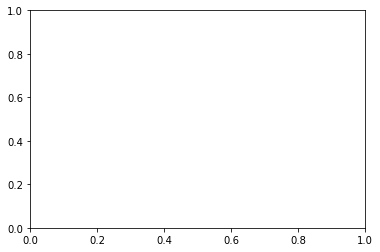

In [369]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')
#Keep Kaggle; fill in zeros with Wikipedia data, more zero datas on wiki

In [ ]:
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')
#keep Kaggle; fill in zeros with Wikipedia data.

In [ ]:
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

In [370]:
#take out outlier
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')
#Keep Kaggle; fill in zeros with Wikipedia data.

KeyError: 'box_office'

In [371]:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

KeyError: "None of [Index(['release_date_wiki', 'release_date_kaggle'], dtype='object')] are in the [columns]"

In [372]:
#Single out big outlier
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]


KeyError: 'release_date_wiki'

In [373]:
#Drop it because the wiki title and kaggle title don't match up
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

KeyError: 'release_date_wiki'

In [374]:
movies_df[movies_df['release_date_wiki'].isnull()]
#Kaggle title present, drop all wiki data for release date

KeyError: 'release_date_wiki'

In [375]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)


KeyError: 'Language'

In [376]:
movies_df['original_language'].value_counts(dropna=False)
#Use kaggle data, more convinient

en    5989
fr      16
es      10
it       8
de       6
ja       4
pt       4
zh       4
da       2
hi       2
sv       1
ko       1
ab       1
tr       1
he       1
ar       1
cn       1
ru       1
Name: original_language, dtype: int64

In [377]:
movies_df[['Production company(s)','production_companies']]
#Kaggle more consistent

KeyError: "['Production company(s)'] not in index"

In [378]:
#drop the title_wiki, release_date_wiki, Language, and Production company(s) columns.
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

KeyError: "['title_wiki' 'release_date_wiki' 'Language' 'Production company(s)'] not found in axis"

In [379]:
#fill missing kagle data function
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [380]:
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

KeyError: "['running_time'] not found in axis"

In [301]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)
#This code shows video only has one value

video


In [302]:
movies_df['video'].value_counts(dropna=False)
#False for every row, so not important to include this

False    6053
Name: video, dtype: int64

In [303]:
#reorder
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]
#Rename cols
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [309]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]
rating_counts

,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"
2,263.00,797.00,525.00,"2,479.00","1,810.00","8,510.00","2,916.00","6,035.00",690.00,"2,035.00"
3,169.00,772.00,233.00,"1,665.00",616.00,"6,213.00",759.00,"3,433.00",154.00,"1,483.00"
4,47.00,351.00,31.00,496.00,77.00,"1,133.00",66.00,557.00,12.00,211.00
5,237.00,785.00,270.00,"1,716.00",664.00,"6,608.00",723.00,"2,959.00",166.00,"1,130.00"
...,...,...,...,...,...,...,...,...,...,...
176267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
176269,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
176271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [311]:
#left merge because we want to keep everything in movie_df
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')
#fill in NaN with 0's
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)